# 🏴‍☠️ UAB THE HACK! 2025 - WiFi Dataset Analysis
## Nivel 1: ROOKIE - Análisis Básico

**Objetivo:** Explorar y visualizar el dataset de WiFi de la UAB

**Dataset:**
- Access Points (APs): 2,333 archivos con snapshots de APs del campus
- Clientes: 3,199 archivos con dispositivos conectados
- Período: Abril-Julio 2025

---

## 📦 1. Importar Librerías

Primero, importamos las librerías necesarias para el análisis.

In [2]:
# Librerías estándar y científicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from pathlib import Path
from utils.data_loader import load_aps

# Configuración general

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 18,
    "axes.labelsize": 14
})

# Carga de funciones personalizadas
from utils.data_loader import (
    load_aps,
    load_clients,
    print_dataset_summary,
    get_top_aps
)

print("✅ Librerías y utilidades cargadas correctamente")

✅ Librerías y utilidades cargadas correctamente


## 📂 2. Cargar Datos

Cargamos una muestra del dataset. Empezaremos con 10 archivos para exploración rápida.

**Nota:** Para cargar TODO el dataset, cambia `max_files=None`

In [4]:
# Cargar Access Points (primeros 10 archivos)
df_aps = load_aps(
    data_dir="../anonymized_data/aps",
    max_files=10,
    verbose=True
)

print("\n" + "="*60)
print(f"🎯 APs cargados: {len(df_aps):,} registros")
print("="*60)
# Cargar Clientes (primeros 10 archivos)
df_clients = load_clients(
    data_dir="../anonymized_data/clients",
    max_files=None,
    verbose=True
)

print("\n" + "="*60)
print(f"🎯 Clientes cargados: {len(df_clients):,} registros")
print("="*60)

📁 Encontrados 10 archivos en ..\anonymized_data\aps
📊 Cargando 10 archivos...
   Procesados 10/10 archivos... (11280 registros)
✅ Cargados 11280 registros de 10 archivos
💾 Memoria: 14.66 MB

🎯 APs cargados: 11,280 registros
📁 Encontrados 10 archivos en ..\anonymized_data\clients
📊 Cargando todos archivos...
   Procesados 10/10 archivos... (11519 registros)
✅ Cargados 11519 registros de 10 archivos
💾 Memoria: 20.60 MB

🎯 Clientes cargados: 11,519 registros


## 🔍 3. Exploración Inicial

Veamos qué información tenemos disponible.

In [5]:
# Ver primeras filas de APs
print("📡 MUESTRA DE ACCESS POINTS:")
df_aps.head()

📡 MUESTRA DE ACCESS POINTS:


""


In [6]:
# Ver primeras filas de Clientes
print("📱 MUESTRA DE CLIENTES:")
df_clients.head()

📱 MUESTRA DE CLIENTES:


,associated_device,associated_device_mac,associated_device_name,authentication_type,band,channel,client_category,client_type,connected_device_type,connection,...,swarm_id,user_role,username,vlan,usage,failure_reason,timestamp,hour,day_of_week,date
0,AP_8e2d9933ec92,AP_5cdc80c05afc,AP-CEDU26,MAC Authentication,5.0,100 (20 MHz),SmartDevice,WIRELESS,AP,"802.11ac, 802.11v",...,,UAB,USER_87e3ddea248c,VLAN_A,NaN,NaN,2025-04-02 09:56:27.000,9.0,Wednesday,2025-04-02
1,AP_f6e291deb8b9,AP_b509bd7bc558,AP-VET49,MAC Authentication,2.4,1 (20 MHz),Computer,WIRELESS,AP,NaN,...,,conv_authenticad,USER_94894477ff4b,VLAN_A,NaN,NaN,2025-04-02 19:52:24.927,19.0,Wednesday,2025-04-02
2,AP_875979a461af,AP_e8c7358799e2,AP-LLET39,MAC Authentication,2.4,1 (20 MHz),Computer,WIRELESS,AP,"802.11gn, 802.11k, 802.11v",...,NaN,conv_authenticad,USER_b3ed96b2b8f7,VLAN_A,NaN,NaN,2025-04-02 14:06:38.628,14.0,Wednesday,2025-04-02
3,AP_332aab2f3da0,AP_35f1fd725406,AP-SAB-S239,MAC Authentication,5.0,44 (20 MHz),SmartDevice,WIRELESS,AP,"802.11ac, 802.11k, 802.11v",...,,conv_authenticad,USER_744af19bbca3,VLAN_A,NaN,NaN,2025-04-02 03:05:49.183,3.0,Wednesday,2025-04-02
4,AP_332aab2f3da0,AP_35f1fd725406,AP-SAB-S239,MAC Authentication,5.0,44 (20 MHz),SmartDevice,WIRELESS,AP,"802.11ac, 802.11k, 802.11v",...,,conv_authenticad,USER_96645ec9c9d2,VLAN_A,NaN,NaN,2025-03-28 13:29:39.000,13.0,Friday,2025-03-28


In [15]:
# Información del dataset de APs
print_dataset_summary(df_aps, "Access Points")


📊 RESUMEN: Access Points

🔢 Registros totales: 11,280
📝 Columnas: 32
💾 Memoria: 14.75 MB

📅 Rango temporal:
   Inicio: 2025-01-21 09:34:51
   Fin:    2025-04-03 00:05:47
   Días:   71

📋 Columnas disponibles:
   • ap_deployment_mode             (100.0% completo)
   • ap_group                       ( 26.1% completo)
   • client_count                   (100.0% completo)
   • cluster_id                     (100.0% completo)
   • controller_name                (100.0% completo)
   • cpu_utilization                (100.0% completo)
   • firmware_version               (100.0% completo)
   • gateway_cluster_id             (100.0% completo)
   • gateway_cluster_name           (100.0% completo)
   • group_name                     (100.0% completo)
   ... y 22 columnas más




In [16]:
# Información del dataset de Clientes
print_dataset_summary(df_clients, "Clientes")


📊 RESUMEN: Clientes

🔢 Registros totales: 11,519
📝 Columnas: 46
💾 Memoria: 21.86 MB

📅 Rango temporal:
   Inicio: 2025-03-28 12:08:19.808000
   Fin:    2025-04-03 06:15:31
   Días:   5

📋 Columnas disponibles:
   • associated_device              (100.0% completo)
   • associated_device_mac          (100.0% completo)
   • associated_device_name         (100.0% completo)
   • authentication_type            ( 97.3% completo)
   • band                           ( 95.6% completo)
   • channel                        ( 95.6% completo)
   • client_category                ( 96.5% completo)
   • client_type                    (100.0% completo)
   • connected_device_type          (100.0% completo)
   • connection                     ( 93.7% completo)
   ... y 36 columnas más




## 📊 4. Estadísticas Básicas

### 4.1 Access Points

In [30]:
# Número de APs únicos
unique_aps = df_aps['name'].nunique()
print(f"📡 APs únicos en el campus: {unique_aps}")

# Estado de los APs
print("\n🔌 Estado de los APs:")
print(df_aps['status'].value_counts())

# APs más populares (por número de clientes)
print("\n👥 Top 10 APs por número de clientes conectados:")
top_aps = df_aps.nlargest(10, 'client_count')[['name', 'client_count', 'status']]
print(top_aps)

📡 APs únicos en el campus: 1147

🔌 Estado de los APs:
status
Up      2513363
Down     149832
Name: count, dtype: int64

👥 Top 10 APs por número de clientes conectados:
                name  client_count status
238144   AP-BIBCIE01           159     Up
1916029    AP-LLET01           159     Up
237002   AP-BIBCIE01           158     Up
239286   AP-BIBCIE01           158     Up
242712   AP-BIBCIE01           158     Up
230150   AP-BIBCIE01           156     Up
241570   AP-BIBCIE01           156     Up
231292   AP-BIBCIE01           154     Up
92360    AP-BIBCIE01           153     Up
234718   AP-BIBCIE01           153     Up


### 4.2 Clientes/Dispositivos

In [7]:
# Dispositivos únicos
unique_devices = df_clients['macaddr'].nunique()
print(f"📱 Dispositivos únicos: {unique_devices:,}")

# Tipos de red
print("\n🌐 Distribución por tipo de red:")
print(df_clients['network'].value_counts())

# Sistemas operativos
print("\n💻 Top 10 sistemas operativos:")
print(df_clients['os_type'].value_counts().head(10))

# Categorías de dispositivos
print("\n📦 Categorías de dispositivos:")
print(df_clients['client_category'].value_counts())

📱 Dispositivos únicos: 3,803

🌐 Distribución por tipo de red:
network
UAB        7728
eduroam    3429
IdC         328
IdC5GHz      30
Name: count, dtype: int64

💻 Top 10 sistemas operativos:
os_type
Apple iOS Device           2760
Android                    2393
Windows 8/10/11            1970
Mac OS                     1156
Samsung Android             454
Apple iPhone                384
--                          350
Windows                     305
HP Printer                  257
Chromecast Media Player     240
Name: count, dtype: int64

📦 Categorías de dispositivos:
client_category
SmartDevice                   6398
Computer                      3584
Home Audio/Video Equipment     525
Printer                        307
IoT                            180
Generic                         32
Game Console                    25
Lighting                        20
Monitoring Devices              18
Embedded                        16
Router                           8
Name: count, dtype: int

## 📈 5. Visualizaciones Básicas

### 5.1 Zonas "Hotspot" - APs más utilizados

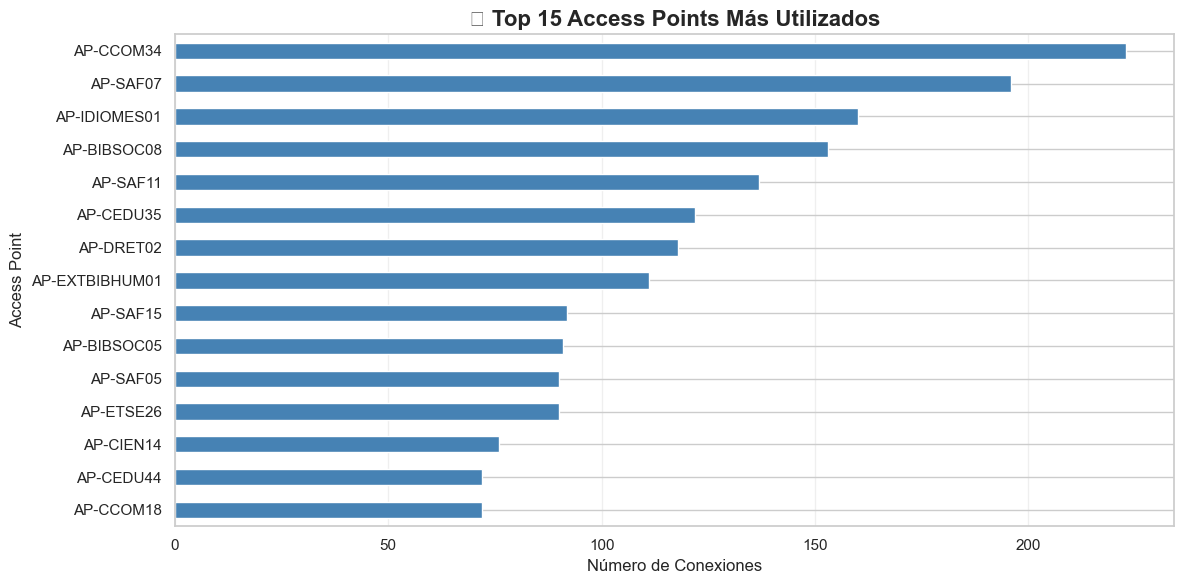


🔥 El AP más usado es: AP-CCOM34 con 223 conexiones


In [20]:
# Top 15 APs más utilizados
top_aps_usage = df_clients['associated_device_name'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_aps_usage.plot(kind='barh', color='steelblue')
plt.title('📡 Top 15 Access Points Más Utilizados', fontsize=16, fontweight='bold')
plt.xlabel('Número de Conexiones', fontsize=12)
plt.ylabel('Access Point', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n🔥 El AP más usado es: {top_aps_usage.index[0]} con {top_aps_usage.values[0]:,} conexiones")

### 5.2 Patrones Temporales - Actividad por Hora

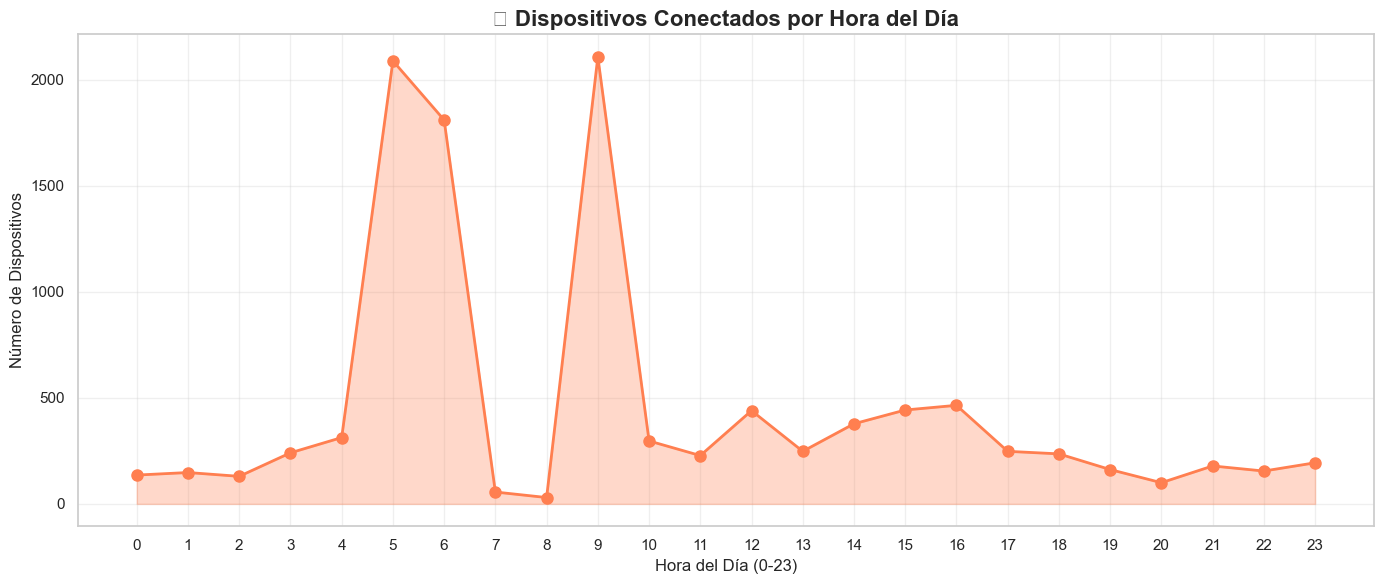


🕐 Hora pico: 9.0:00 con 2,109 dispositivos conectados


In [21]:
# Actividad por hora del día
hourly_activity = df_clients.groupby('hour').size()

plt.figure(figsize=(14, 6))
plt.plot(hourly_activity.index, hourly_activity.values, marker='o', linewidth=2, markersize=8, color='coral')
plt.fill_between(hourly_activity.index, hourly_activity.values, alpha=0.3, color='coral')
plt.title('⏰ Dispositivos Conectados por Hora del Día', fontsize=16, fontweight='bold')
plt.xlabel('Hora del Día (0-23)', fontsize=12)
plt.ylabel('Número de Dispositivos', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Identificar hora pico
peak_hour = hourly_activity.idxmax()
peak_devices = hourly_activity.max()
print(f"\n🕐 Hora pico: {peak_hour}:00 con {peak_devices:,} dispositivos conectados")

### 5.3 Distribución de Calidad de Señal

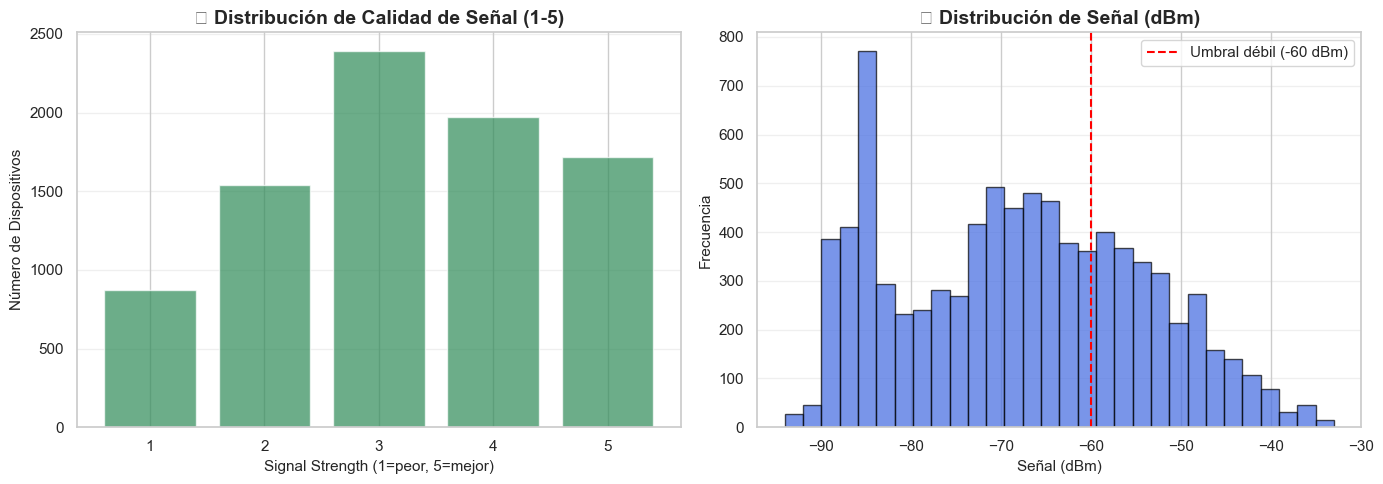


📡 Señal promedio: -67.9 dBm
⚠️  Dispositivos con señal débil (<-60 dBm): 5,821 (50.5%)


In [22]:
# Distribución de signal_strength (1-5)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Signal Strength (1-5)
signal_counts = df_clients['signal_strength'].value_counts().sort_index()
axes[0].bar(signal_counts.index, signal_counts.values, color='seagreen', alpha=0.7)
axes[0].set_title('📶 Distribución de Calidad de Señal (1-5)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Signal Strength (1=peor, 5=mejor)', fontsize=11)
axes[0].set_ylabel('Número de Dispositivos', fontsize=11)
axes[0].set_xticks([1, 2, 3, 4, 5])
axes[0].grid(axis='y', alpha=0.3)

# Gráfico 2: Signal dB (histograma)
axes[1].hist(df_clients['signal_db'].dropna(), bins=30, color='royalblue', alpha=0.7, edgecolor='black')
axes[1].set_title('📊 Distribución de Señal (dBm)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Señal (dBm)', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontsize=11)
axes[1].axvline(x=-60, color='red', linestyle='--', label='Umbral débil (-60 dBm)')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
avg_signal = df_clients['signal_db'].mean()
weak_signal = (df_clients['signal_db'] < -60).sum()
pct_weak = (weak_signal / len(df_clients)) * 100

print(f"\n📡 Señal promedio: {avg_signal:.1f} dBm")
print(f"⚠️  Dispositivos con señal débil (<-60 dBm): {weak_signal:,} ({pct_weak:.1f}%)")

### 5.4 Tipos de Red (UAB vs eduroam)

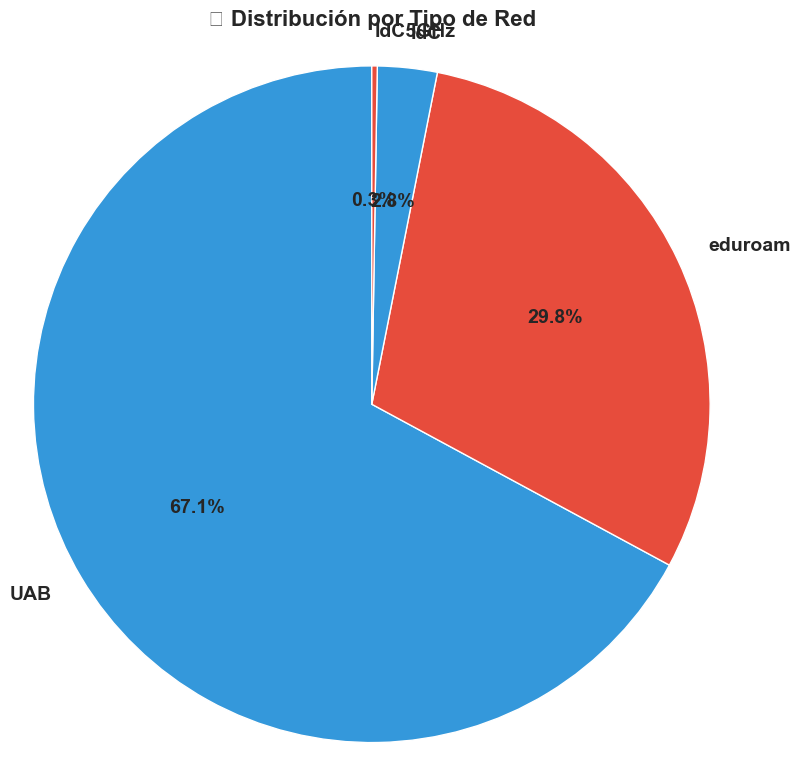


📊 Desglose por red:
   UAB: 7,728 dispositivos (67.1%)
   eduroam: 3,429 dispositivos (29.8%)
   IdC: 328 dispositivos (2.8%)
   IdC5GHz: 30 dispositivos (0.3%)


In [23]:
# Distribución por tipo de red
network_counts = df_clients['network'].value_counts()

plt.figure(figsize=(8, 8))
colors = ['#3498db', '#e74c3c']
plt.pie(network_counts.values, labels=network_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 14, 'weight': 'bold'})
plt.title('🌐 Distribución por Tipo de Red', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\n📊 Desglose por red:")
for network, count in network_counts.items():
    pct = (count / len(df_clients)) * 100
    print(f"   {network}: {count:,} dispositivos ({pct:.1f}%)")

### 5.5 Bandas WiFi (2.4 GHz vs 5 GHz)

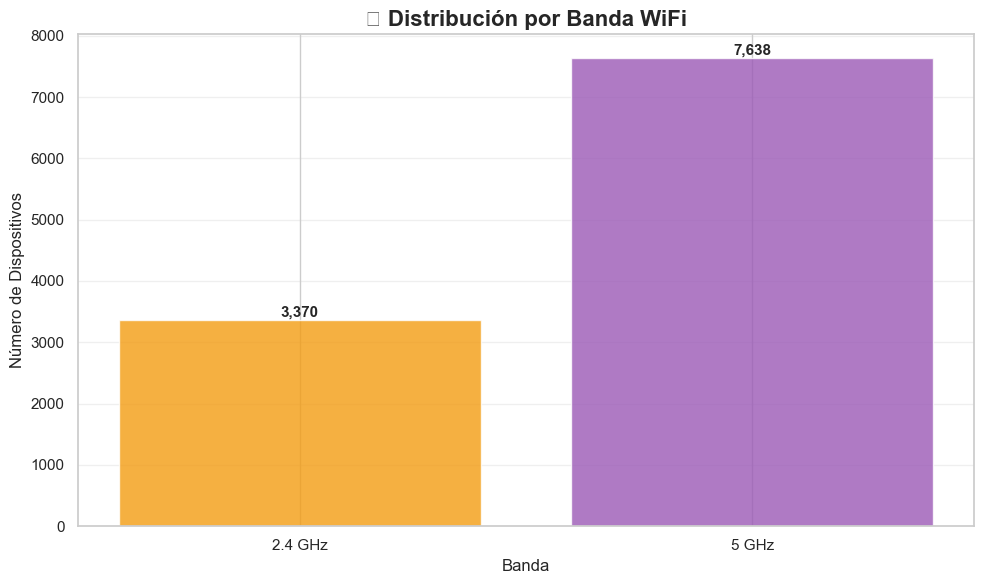

In [24]:
# Distribución por banda
band_counts = df_clients['band'].value_counts().sort_index()
band_labels = {2.4: '2.4 GHz', 5: '5 GHz', 6: '6 GHz'}

plt.figure(figsize=(10, 6))
colors_band = ['#f39c12', '#9b59b6', '#1abc9c']
bars = plt.bar([band_labels.get(x, str(x)) for x in band_counts.index],
               band_counts.values, color=colors_band[:len(band_counts)], alpha=0.8)
plt.title('📻 Distribución por Banda WiFi', fontsize=16, fontweight='bold')
plt.xlabel('Banda', fontsize=12)
plt.ylabel('Número de Dispositivos', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## 🎯 6. Insights y Conclusiones

Basándote en las visualizaciones anteriores, responde:

**1. ¿Cuál es el AP más utilizado? ¿En qué edificio está?**

```
Tu respuesta aquí:
```

**2. ¿A qué hora hay más actividad? ¿Por qué crees que es?**

```
Tu respuesta aquí:
```

**3. ¿Qué porcentaje de dispositivos tiene señal débil?**

```
Tu respuesta aquí:
```

**4. ¿Cuál es la red más utilizada (UAB o eduroam)?**

```
Tu respuesta aquí:
```

**5. ¿Qué banda WiFi es más popular (2.4 o 5 GHz)? ¿Por qué?**

```
Tu respuesta aquí:
```

## 🚀 7. Próximos Pasos

¡Felicidades! Has completado el análisis básico. Ahora puedes:

### Ideas para Expandir tu Análisis:

1. **Cargar más datos:** Cambia `max_files=100` o `max_files=None` para todo el dataset

2. **Análisis por edificio:**
   - Extraer el código del edificio del nombre del AP (ej: AP-VET71 → VET)
   - Comparar actividad entre edificios

3. **Análisis temporal más profundo:**
   - Comparar días laborables vs fines de semana
   - Identificar patrones semanales

4. **Problemas de conectividad:**
   - Identificar APs con peor señal
   - Analizar zonas problemáticas

5. **Dashboard interactivo:**
   - Usar Plotly para gráficos interactivos
   - Crear filtros por fecha/hora/edificio

### ¿Listo para el siguiente nivel?

👉 Continúa con: **`02_intermediate_mobility.ipynb`**

---

**🏴‍☠️ UAB THE HACK! 2025 - ¡Buena suerte! 🚀**